In [1]:
import pandas as pd
import shap
import joblib

df = pd.read_csv("../data/clean_telco.csv")

model = joblib.load("../models/churn_model.pkl")

y = df['Churn']
X = df.drop('Churn', axis=1)


In [6]:
import numpy as np

# Get the preprocessor inside your pipeline
preprocessor = model['prep']

# Extract transformers
ohe = preprocessor.named_transformers_['cat']  # OneHotEncoder
numeric_features = preprocessor.transformers_[1][2]  # numeric column names

# Get actual OHE feature names
ohe_feature_names = ohe.get_feature_names_out(preprocessor.transformers_[0][2])

# Combine numeric + encoded categorical
feature_names = np.concatenate([ohe_feature_names, numeric_features])

print("Number of features:", len(feature_names))
feature_names[:20]  # preview first 20


Number of features: 45


array(['gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes'], dtype=object)

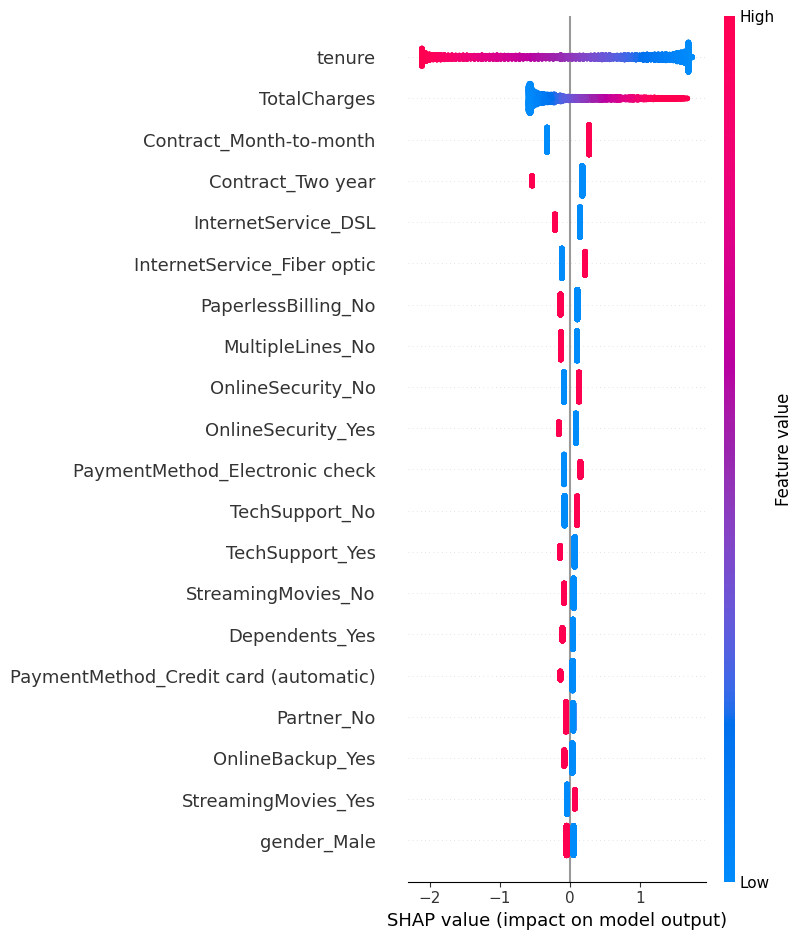

In [7]:
# Transform X
X_transformed = model['prep'].transform(X)

# Create explainer
explainer = shap.Explainer(model['model'], X_transformed)

# Compute values
shap_values = explainer(X_transformed)

# Plot using REAL names
shap.summary_plot(shap_values, X_transformed, feature_names=feature_names)


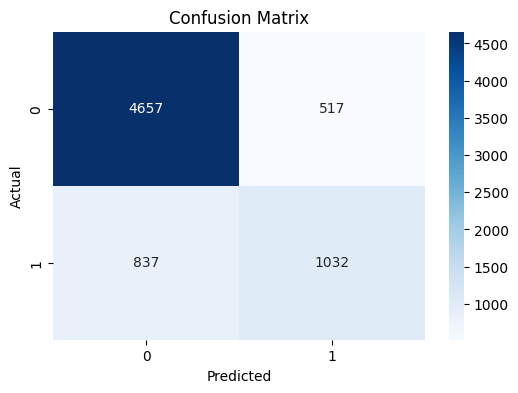

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test dataset
y_pred = model.predict(X)

# Confusion matrix
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [9]:
print("Classification Report:\n")
print(classification_report(y, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      5174
           1       0.67      0.55      0.60      1869

    accuracy                           0.81      7043
   macro avg       0.76      0.73      0.74      7043
weighted avg       0.80      0.81      0.80      7043



In [10]:
# Predict probabilities (likelihood of churn)
y_pred_proba = model.predict_proba(X)[:, 1]

# Predict class labels (0/1)
y_pred = model.predict(X)

# Add predictions to dataframe
df['Predicted_Churn'] = y_pred
df['Churn_Probability'] = y_pred_proba

# Save file for Power BI
df.to_csv("../data/telco_for_powerbi.csv", index=False)

print("File saved! Load telco_for_powerbi.csv into Power BI.")


File saved! Load telco_for_powerbi.csv into Power BI.
